In [710]:
#Import Libraries

import pandas as pd
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
df = pd.read_csv("core/teams.csv")
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [711]:
# Dropping columns
df = df.drop(columns=['CS'])

#Fill columns I need to use with the median of the column
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())


In [712]:
#Filter for rows where 'yearID' is greater than 1970
df = df[df['yearID'] > 1989]

In [713]:
#Part 2- Correlation at a glance

df.corr()['W']

yearID        0.109965
Rank         -0.779273
G             0.376730
Ghome         0.372358
W             1.000000
L            -0.720550
R             0.583108
AB            0.397741
H             0.484689
2B            0.368403
3B           -0.004774
HR            0.406879
BB            0.486509
SO            0.074004
SB            0.103861
HBP           0.196462
SF            0.349985
RA           -0.402933
ER           -0.381593
ERA          -0.590914
CG            0.066856
SHO           0.488286
SV            0.683249
IPouts        0.438397
HA           -0.145877
HRA          -0.175087
BBA          -0.221922
SOA           0.412157
E            -0.204783
DP           -0.019469
FP            0.351153
attendance    0.497893
BPF           0.062758
PPF          -0.060443
Name: W, dtype: float64

In [714]:
#Import Libraries 

import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import sqlite3
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import style
import pickle 

In [715]:
df['H'] = df['H'].fillna(df['H'].median())
df['AB'] = df['AB'].fillna(df['AB'].median())
df['BB'] = df['BB'].fillna(df['BB'].median())
df['HBP'] = df['HBP'].fillna(df['HBP'].median())
df['2B'] = df['2B'].fillna(df['2B'].median())
df['3B'] = df['3B'].fillna(df['3B'].median())
df['HR'] = df['HR'].fillna(df['HR'].median())
df['SF'] = df['SF'].fillna(df['SF'].median())



In [716]:
#Batting Average
BA = df['BA'] = df['H']/df['AB']

#On Base Percentage
OBP = df['OBP'] = (df['H'] + df['BB'] + df['HBP']) / (df['AB'] + df['BB'] + df['HBP'] + df['SF'])

#Slugging Percentage
SLG = df['SLG'] = (df['H'] + df['2B'] + (2*df['3B']) + (3*df['HR'])) / df['AB']

#DIFF
df["DIFF"] = df['R'] - df['RA']

#WHIP
df["WHIP"] = df["BB"] + df["H"] / (df["IPouts"]/3)

#LOB- (Hits, BB, HBP) - R - GIDP - CS
#OPS
df["OPS"] = OBP + SLG

In [717]:
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,PPF,teamIDBR,teamIDlahman45,teamIDretro,BA,OBP,SLG,DIFF,WHIP,OPS
2047,1990,NL,ATL,ATL,W,6,162,81.0,65,97,...,106,ATL,ATL,ATL,0.250000,0.310853,0.395531,-139,473.962462,0.706384
2048,1990,AL,BAL,BAL,E,5,161,80.0,76,85,...,98,BAL,BAL,BAL,0.245471,0.329702,0.370055,-29,660.925221,0.699758
2049,1990,AL,BOS,BOS,E,1,162,81.0,88,74,...,105,BOS,BOS,BOS,0.272299,0.344003,0.395214,35,599.041609,0.739217
2050,1990,AL,CAL,ANA,W,4,162,81.0,80,82,...,97,CAL,CAL,CAL,0.259964,0.328877,0.391382,-16,566.995873,0.720260
2051,1990,AL,CHA,CHW,W,2,162,80.0,94,68,...,98,CHW,CHA,CHA,0.257867,0.319805,0.379489,49,478.961132,0.699295


In [718]:
df.to_csv("matt_scatter_final.csv")

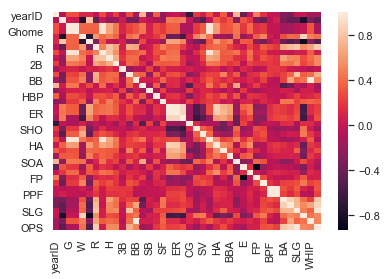

<Figure size 7200x7200 with 0 Axes>

In [719]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

df_linear = df

sns.heatmap(df_linear.corr())
plt.figure(figsize = (100,100))
plt.show()

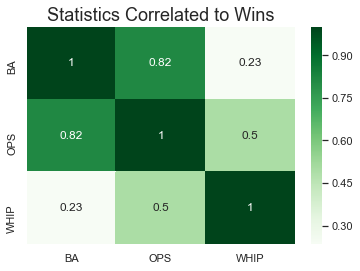

In [720]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

df_linear = df

df_graph = df_linear[[ "DivWin", "BA", "OPS","WHIP"]]

sns.heatmap(df_graph.corr(), annot=True, cmap="Greens")
plt.title("Statistics Correlated to Wins", fontsize = 18)
plt.savefig("WinCorr.png")
plt.show()

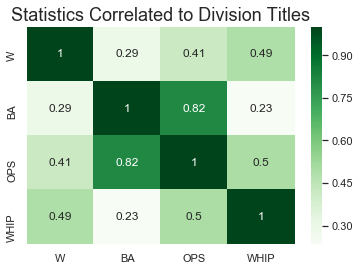

In [721]:
df_linear = df

df_graph = df_linear[[ "W", "BA", "OPS" , "WHIP"]]

sns.heatmap(df_graph.corr(), annot=True, cmap="Greens")
plt.title("Statistics Correlated to Division Titles", fontsize = 18)
plt.savefig("DivCorr.png")
plt.show()

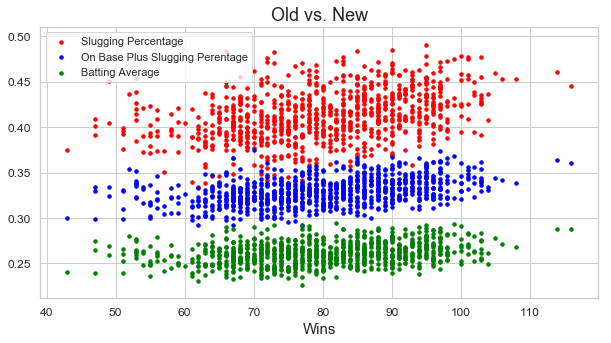

In [722]:
x = df_linear["W"]
BA = df_linear["BA"]
OBP = df_linear["OBP"]
SLG = df_linear["SLG"]

plt.figure(figsize = (10,5))

plt.scatter(x, SLG, label = "Slugging Percentage",  s= 12 , color = "red")
plt.scatter(x, OBP, label = "On Base Plus Slugging Perentage",  s= 12 , color = "blue")
plt.scatter(x,BA, label = "Batting Average", s = 12,  color = "green")



plt.xlabel("Wins", fontsize= 15) 
plt.xticks(size = 12) ; plt.yticks(size = 12)
plt.title("Old vs. New", fontsize = 18)

plt.savefig("Old_vs_New.png")
plt.legend()

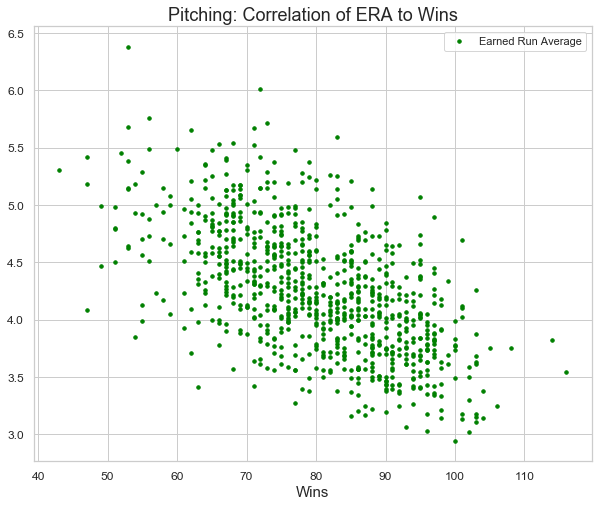

In [723]:
x = df_linear["W"]
ERA = df_linear["ERA"]
plt.figure(figsize = (10,8))

plt.scatter(x,ERA, label = "Earned Run Average", s = 12,  color = "green")



plt.xlabel("Wins", fontsize= 15) 
plt.xticks(size = 12) ; plt.yticks(size = 12)
plt.title("Pitching: Correlation of ERA to Wins", fontsize = 18)


plt.legend()

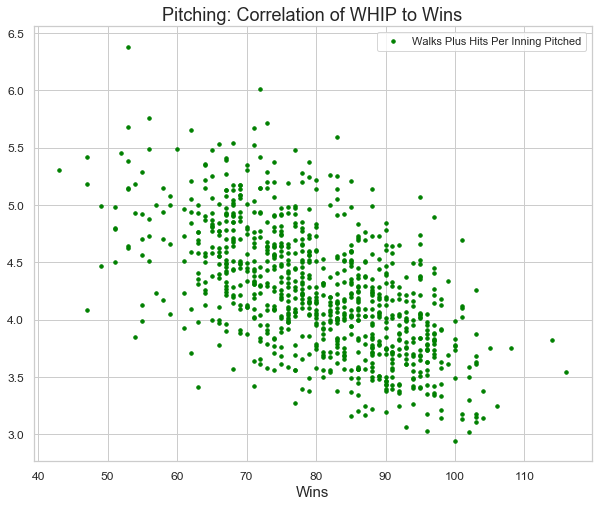

In [724]:
x = df_linear["W"]
WHIP = df_linear["WHIP"]
plt.figure(figsize = (10,8))

plt.scatter(x,ERA, label = "Walks Plus Hits Per Inning Pitched", s = 12,  color = "green")


plt.xlabel("Wins", fontsize= 15) 
plt.xticks(size = 12) ; plt.yticks(size = 12)
plt.title("Pitching: Correlation of WHIP to Wins", fontsize = 18)


plt.legend()

In [725]:
#Part 2- Linear Regression

In [726]:
# BA vs. W

X = np.array(df[["BA", "ERA"]])
y = np.array(df["W"])

best = 0 
for b in range(30):

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = 0.25)

    linear = linear_model.LinearRegression()

    linear.fit(x_train,y_train)
    acc_BA = linear.score(x_test, y_test)
    print(acc_BA)

    if acc_BA > best:
        best = acc_BA
        with open("BA_vs_Win.pickle", "wb") as f: 
            pickle.dump(linear, f)
    
pickle_in = open("BA_vs_Win.pickle", "rb")
linear = pickle.load(pickle_in)

0.5710619586646928
0.5731138268584273
0.5888027945483991
0.42129830664766377
0.5037997600811295
0.6239120485885871
0.4561051217127335
0.5691182460122908
0.5427589589194693
0.5470305930878208
0.5136236846175724
0.5414815137067737
0.6271938948151823
0.5914882703402314
0.5622269870949212
0.5761022661813099
0.5393608305189345
0.5182229112851786
0.5776063973719426
0.531557012108633
0.6117735953487589
0.5906051270367826
0.6250792742355564
0.6438531294041892
0.5150115955566679
0.6025557741523431
0.6035813962092247
0.5404427154268475
0.48855485645655483
0.5376724833778241


In [727]:
acc_BA.mean()

0.5376724833778241

In [728]:
# OBP, WHIP vs. W

X = np.array(df[["OPS", "ERA"]])
y = np.array(df["W"])

best = 0 
for b in range(30):

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = .25, random_state= 30)

    linear = linear_model.LinearRegression()

    linear.fit(x_train,y_train)
    acc_OPS = linear.score(x_test, y_test)
    print(acc_OPS)

    if acc_OPS > best:
        best = acc_OPS
        with open("OPS.pickle", "wb") as f: 
            pickle.dump(linear, f)
    
pickle_in = open("OPS.pickle", "rb")
linear = pickle.load(pickle_in)

0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283
0.7255085655899283


In [729]:
acc_OPS.mean()

0.7255085655899283

In [730]:
# OBP, ERA, WHIP vs. W

X = np.array(df[["WHIP", "OPS"]])
y = np.array(df["W"])

best = 0 
for b in range(30):

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = .25, random_state= 30)

    linear = linear_model.LinearRegression()

    linear.fit(x_train,y_train)
    acc_OPS = linear.score(x_test, y_test)
    print(acc_OPS)

    if acc_OPS > best:
        best = acc_OPS
        with open("OPS.pickle", "wb") as f: 
            pickle.dump(linear, f)
    
pickle_in = open("OPS.pickle", "rb")
linear = pickle.load(pickle_in)

0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408
0.2837598763676408


In [731]:
acc_OPS.mean()

0.2837598763676408

In [732]:
# OBP, ERA, WHIP vs. W

X = np.array(df[["WHIP", "ERA" ,"OPS"]])
y = np.array(df["W"])

best = 0 
for b in range(30):

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = .25, random_state= 30)

    linear = linear_model.LinearRegression()

    linear.fit(x_train,y_train)
    acc_OPS = linear.score(x_test, y_test)
    print(acc_OPS)

    if acc_OPS > best:
        best = acc_OPS
        with open("OPS.pickle", "wb") as f: 
            pickle.dump(linear, f)
    
pickle_in = open("OPS.pickle", "rb")
linear = pickle.load(pickle_in)

0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599
0.7745589088585599


In [733]:
acc_OPS.mean()

0.7745589088585599

In [734]:
#Part 3 -Logistical Regression Model: Division Wins

In [735]:
# converting dtypes using astype 
df["DivWin"]= df["DivWin"].astype(str)

In [736]:
#create a new column "HR", where if events =home_run, you have a 1, otherwise you have a 0
df['DivWin'] =np.where(df['DivWin']=='Y',1,0)

In [737]:
df["DivWin"].dtype

dtype('int32')

In [738]:
#Import Logistical Regression

from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [739]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [740]:
# Does a high OBP, SLG, and ERA correlate to a Division Title

X = df[["ERA", "BA"]]
y = df["DivWin"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 25 )

#Normalize
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)

model.predict_proba(X_test)

predicts = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predicts)
r2 = model.score(X_test_scaled, y_test)

print(f'MSE: {MSE}, R2: {r2}')

MSE: 0.7971698113207547, R2: 0.2028301886792453


C:\Users\mwhaw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [741]:
#How does OPS and WHIP Correlate to Division Title

X = df[[ "OPS", "ERA"]]
y = df["DivWin"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 25 )

#Normalize
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)

model.predict_proba(X_test)

predicts = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predicts)
r2 = model.score(X_test_scaled, y_test)

print(f'MSE: {MSE}, R2: {r2}')

MSE: 0.419811320754717, R2: 0.5801886792452831


C:\Users\mwhaw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [742]:
#How does OPS and WHIP Correlate to Division Title

X = df[[ "OPS", "WHIP"]]
y = df["DivWin"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 25 )

#Normalize
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)

model.predict_proba(X_test)

predicts = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predicts)
r2 = model.score(X_test_scaled, y_test)

print(f'MSE: {MSE}, R2: {r2}')

MSE: 0.18867924528301888, R2: 0.8113207547169812


C:\Users\mwhaw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
